In [1]:
import analysis
import itertools as itr
import numpy as np

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
sns.set()

In [3]:
algs = ['pcalg', 'ges', 'dci']
nsamples_list = [1000, 10000]
colors = sns.color_palette()
linestyles = ['-', '--']

In [4]:
alg_handles = [mpatches.Patch(color=color, label=alg) for alg, color in zip(algs, colors)]
sample_handles = [
    mlines.Line2D([], [], color='k', linestyle=linestyle, label=nsamples) 
    for nsamples, linestyle in zip(nsamples_list, linestyles)
]

In [5]:
edges_da = analysis.get_edges_da('fig1_data', algs, nsamples_list, [1e-5, 1e-4, 1e-3, 1e-2, 1e-1])
rates_da = analysis.edge_da2tpr_fpr(edges_da)
exact_recovery_da = analysis.edges_da2_exact_recovery(edges_da)

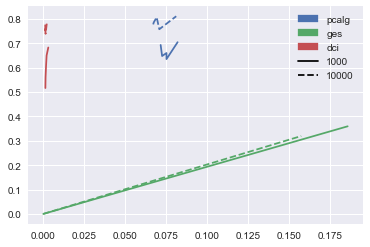

In [6]:
for (alg, color), (nsamples, linestyle) in itr.product(zip(algs, colors), zip(nsamples_list, linestyles)):
    tprs = rates_da.sel(alg=alg, nsamples=nsamples, rate='tpr').mean(dim='pair').values
    fprs = rates_da.sel(alg=alg, nsamples=nsamples, rate='fpr').mean(dim='pair').values
    sort_ixs = np.argsort(fprs)
    plt.plot(fprs[sort_ixs], tprs[sort_ixs], color=color, linestyle=linestyle)
plt.legend(handles=alg_handles+sample_handles);

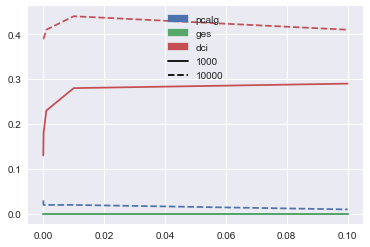

In [7]:
alphas = exact_recovery_da.coords['alpha'].values
for (alg, color), (nsamples, linestyle) in itr.product(zip(algs, colors), zip(nsamples_list, linestyles)):
    exact_recovery = exact_recovery_da.sel(alg=alg, nsamples=nsamples)
    plt.plot(alphas, exact_recovery, color=color, linestyle=linestyle)
plt.legend(handles=alg_handles+sample_handles);